In [1]:
import numpy as np
import matplotlib.pylab as plt
np.set_printoptions(precision=2)
import scipy.io as sio

In [2]:
D = sio.loadmat("data_rnu11.mat")["D"]
strana = 64
p = strana*strana
n = 120

# Pouzijte NMF na data ze scintigrafie
Je vhodne upravit update pravidla nasledujicim zpusobem:
\begin{align}
X^{T}\leftarrow & X^{T}\circ\left(\left(A^{T}D\right)\oslash\left(A^{T}AX^{T} + \epsilon\right)\right)\\
A\leftarrow & A\circ\left(\left(DX\right)\oslash\left(AX^{T}X + \epsilon\right)\right)
\end{align}
Zkuste nejprve $\epsilon = 0$ a pak $\epsilon > 0$.

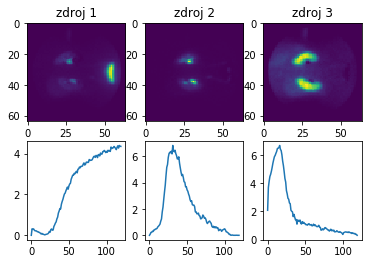

In [4]:
r = 3 ### nastavime predpokladany pocet zdroju
eps = 0.1

# nastavime nejake inicializacni hodnoty pro A a X
A = np.random.random(size=(p,r))
X = np.random.random(size=(n,r))

# vytvorte for-cyklus, ktery 100x vykona updatovaci pravidla NMF
for i in range(100):
    XT = X.T * ((A.T@D) / (A.T@A@X.T + eps))
    X = XT.T
    A = A * ((D@X) / (A@X.T@X + eps))
    
plt.figure()
for i in range(1,r+1):
    plt.subplot(2,r,i)
    plt.imshow(A[:,i-1].reshape(strana,strana),interpolation='none')
    plt.title('zdroj %s'%i)
    plt.subplot(2,r,r+i)
    plt.plot(X[:,i-1])

...a na data z hyperspektralniho snimkovani.

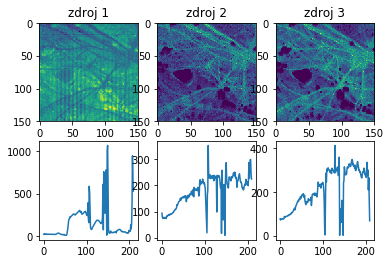

In [6]:
D = sio.loadmat("cviko_hyperspektral.mat")["D"]
strana = 150
p = strana*strana
n = 210

r = 3 ### nastavime predpokladany pocet zdroju
eps = 0.1

# nastavime nejake inicializacni hodnoty pro A a X
A = np.random.random(size=(p,r))
X = np.random.random(size=(n,r))

# vytvorte for-cyklus, ktery 100x vykona updatovaci pravidla NMF
for i in range(100):
    XT = X.T * ((A.T@D) / (A.T@A@X.T + eps))
    X = XT.T
    A = A * ((D@X) / (A@X.T@X + eps))
    
plt.figure()
for i in range(1,r+1):
    plt.subplot(2,r,i)
    plt.imshow(A[:,i-1].reshape(strana,strana),interpolation='none')
    plt.title('zdroj %s'%i)
    plt.subplot(2,r,r+i)
    plt.plot(X[:,i-1])